# Incorporating gene specific covariates

We will use the dataset published in 

In [233]:
import sys
sys.path.append("../src/")

In [234]:
%load_ext autoreload
%autoreload 2

import pydevil

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [235]:
import scanpy as sc
import pandas as pd
import patsy as ptsy


In [236]:
adata = sc.read_h5ad("data/CNA_example/campbell_10x_xeno.h5ad")

In [237]:
cell_to_clone = pd.read_table("data/CNA_example/cell_to_clone.tsv", sep = "\t")
genes_to_chr = pd.read_table("data/CNA_example/hg19_gene_coordinates.tsv", sep = "\t")
clones_profile = { clone : pd.read_csv("data/CNA_example/SA501X3F-cluster_{}.segments.csv".format(clone)) for clone in ["A", "B", "C"]}

In [238]:
adata.obs_names

Index(['AAACCTGTCGACAGCC-1', 'AAAGATGGTAATAGCA-1', 'AACACGTAGCTATGCT-1',
       'AACTCCCAGACAGGCT-1', 'AACTCCCGTACACCGC-1', 'AACTGGTCAAAGAATC-1',
       'AACTGGTCAAAGTGCG-1', 'AACTTTCGTGGCTCCA-1', 'AACTTTCTCGGTTAAC-1',
       'AAGACCTAGCCAGTAG-1',
       ...
       'TTGCGTCGTTCCACTC-1', 'TTGCGTCTCAAACGGG-1', 'TTGCGTCTCGGCATCG-1',
       'TTGGAACTCGTACGGC-1', 'TTTGCGCCAAGTCTAC-1', 'TTTGCGCCAATGGATA-1',
       'TTTGCGCCAGACTCGC-1', 'TTTGCGCTCCAAGCCG-1', 'TTTGGTTAGTAGCCGA-1',
       'TTTGTCAAGCATGGCA-1'],
      dtype='object', length=504)

In [239]:
adata.obs["clone"] = cell_to_clone["clone"].values

In [240]:
adata.raw = adata.copy()
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata)
adata = adata[:, adata.var.highly_variable]
sc.pp.scale(adata)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_pcs=30)
sc.tl.leiden(adata)
sc.tl.umap(adata)

/home/salvatore.milite/miniconda3/envs/scdeepaa/lib/python3.11/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


/home/salvatore.milite/miniconda3/envs/scdeepaa/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/salvatore.milite/miniconda3/envs/scdeepaa/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


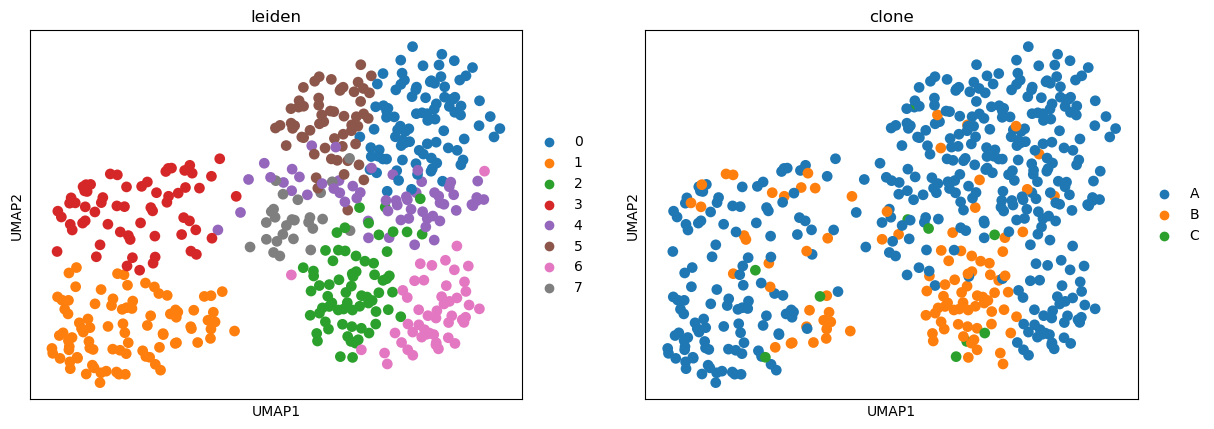

In [241]:
sc.pl.umap(adata, color=["leiden", "clone"])

In [242]:
covariates = ptsy.dmatrix("~ leiden - 1", adata.obs)

In [250]:
gene_specific_covariates = pydevil.from_CNA_and_clones_to_mmatrix(clones_profile,cell_to_clone, genes_to_chr )

Empty DataFrame
Columns: []
Index: []


KeyError: 'integer_copy_number'

In [ ]:
gene_specific_covariates